# Understanding of Resume Dataset

This notebook was made to understand the **Resume Dataset** from [Kaggle](https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset/data) in order to find relevant information for the development of a *machine learning* model, who will classify a resume as do as an ATS (Applicant Tracking System)

## Importation of libs

In [14]:
# data_management
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Upload data

In [15]:
file_path = '../data/Resume.csv'

In [16]:
data = pd.read_csv(file_path, encoding='utf-8', engine='python')
print(f'data uploaded')
data.head()

data uploaded


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


## Understanding

### Amount and shape of the data

In [17]:
print(f'The shape of the data is {data.shape}')

The shape of the data is (2484, 4)


### Columns of the data

In [18]:
print(f'The columns present on the data are {data.columns}')

The columns present on the data are Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


### General Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


### Completeness of the data

In [21]:
data_complete = data.notnull().sum()
print(f'Each column is supposed to has 2484 data and there are:\n{data_complete}')

Each column is supposed to has 2484 data and there are:
ID             2484
Resume_str     2484
Resume_html    2484
Category       2484
dtype: int64


In [9]:
completeness_column = (1 - data.isnull().sum() / len(data)) * 100
print("Completeness by column:\n", completeness_column)

Completeness by column:
 ID             100.0
Resume_str     100.0
Resume_html    100.0
Category       100.0
dtype: float64


In [10]:
completeness_raw = (1 - data.isnull().sum(axis=1) / data.shape[1]) * 100
print("Completeness by row:\n", completeness_raw)

Completeness by row:
 0       100.0
1       100.0
2       100.0
3       100.0
4       100.0
        ...  
2479    100.0
2480    100.0
2481    100.0
2482    100.0
2483    100.0
Length: 2484, dtype: float64


### Unicity of the data

In [22]:
print(f'Number of duplicated rows {data.duplicated().sum()}')

Number of duplicated rows 0


In [23]:
print(f'Unique values\n{data.nunique()}')

Unique values
ID             2484
Resume_str     2482
Resume_html    2482
Category         24
dtype: int64


### Distribution of the data based on the category

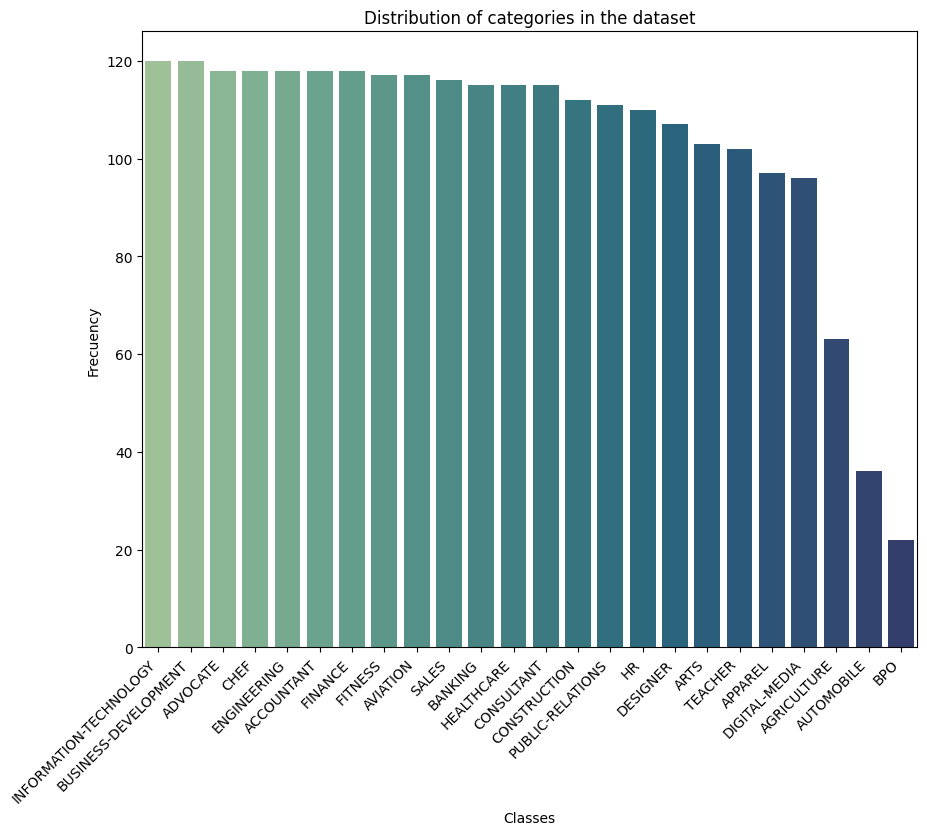

In [24]:
label_counts = data['Category'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette="crest", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Classes")
plt.ylabel("Frecuency")
plt.title("Distribution of categories in the dataset")
plt.show()


### Amount of words and length of the resumes

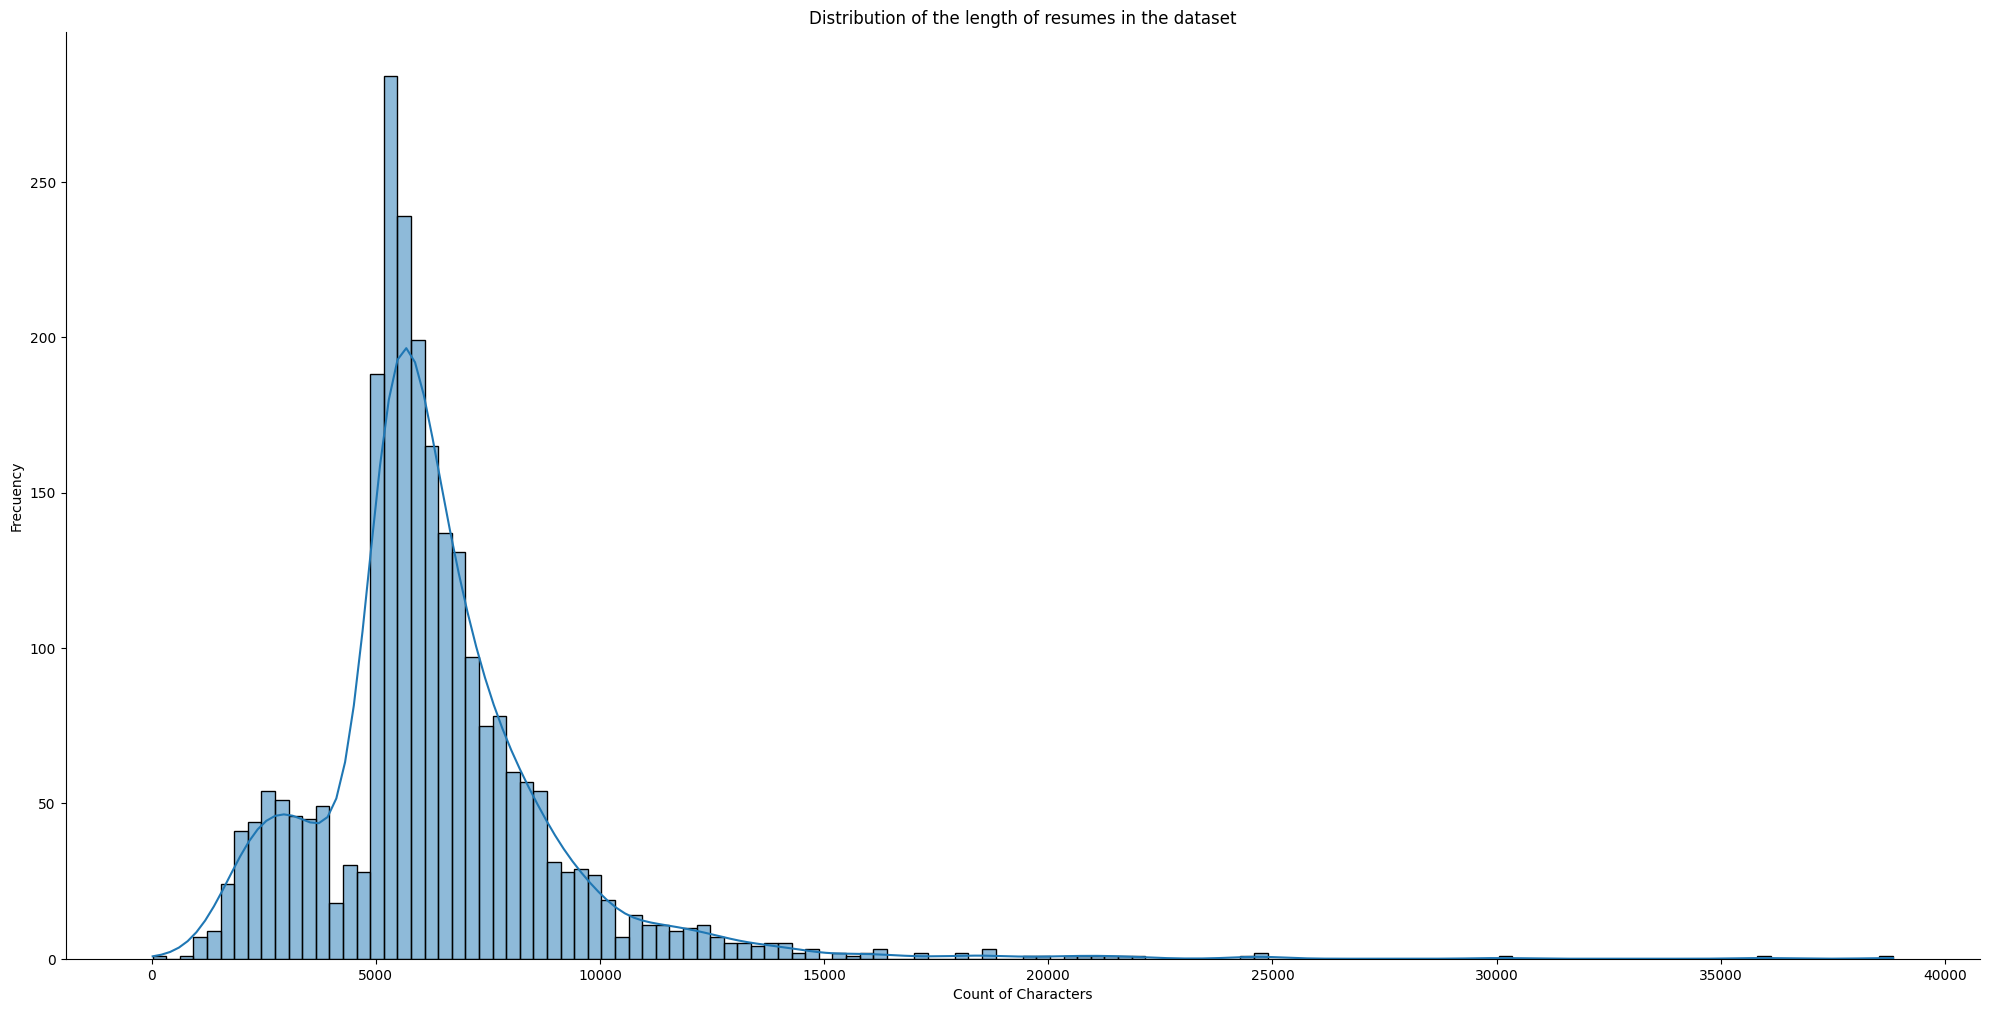

In [36]:
resume_lengths = data['Resume_str'].str.len()
sns.displot(resume_lengths,  kde=True, height=10, aspect=2)
plt.xlabel("Count of Characters")
plt.ylabel("Frecuency in a Resume")
plt.title("Distribution of the length of resumes in the dataset")
plt.show()

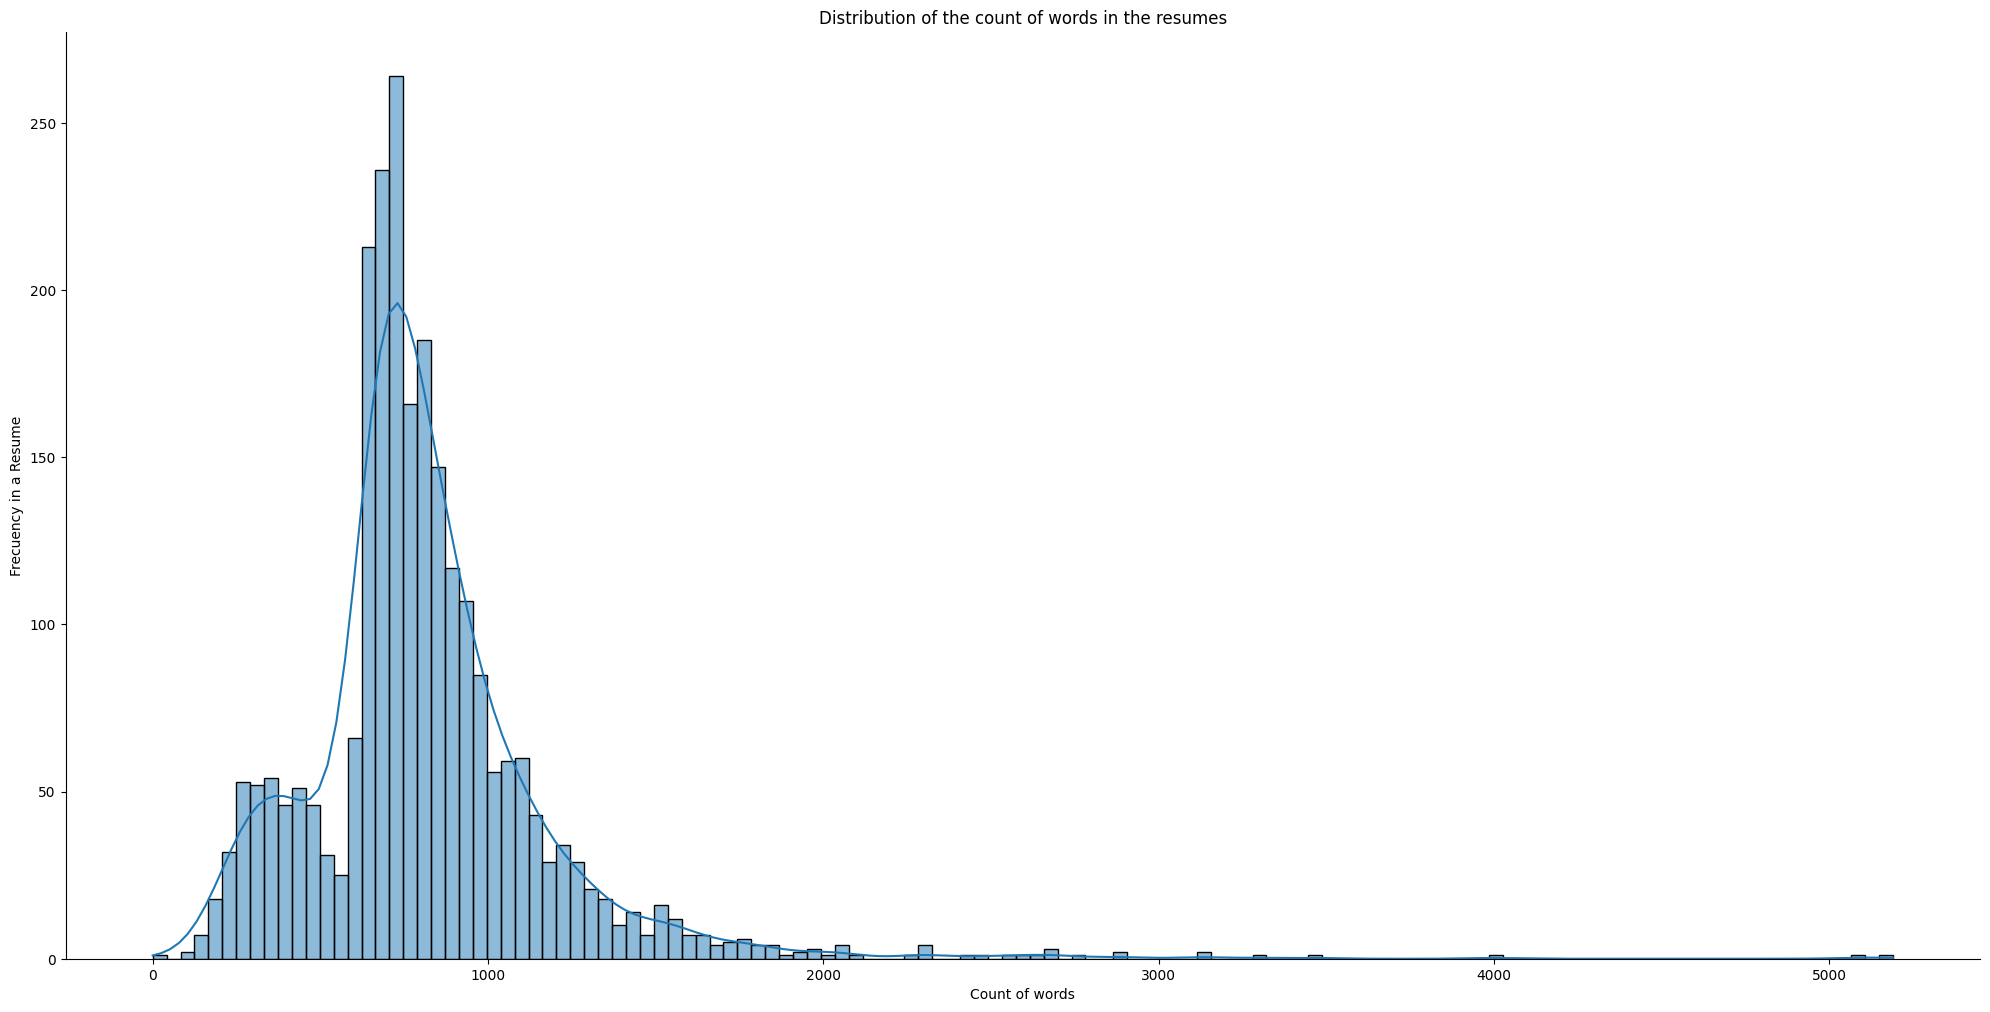

In [40]:
word_counts = data['Resume_str'].str.split().str.len()
sns.displot(word_counts,  kde=True, height=10, aspect=2)
plt.xlabel("Count of words")
plt.ylabel("Frecuency in a Resume")
plt.title("Distribution of the count of words in the resumes")
plt.show()

In [41]:
stats_df = pd.DataFrame({
    'Metric': ['Mean Length', 'Median Length', 'Std Length', 'Min Length', 'Max Length',
               'Mean Words', 'Median Words', 'Std Words', 'Min Words', 'Max Words'],
    'Value': [resume_lengths.mean(), resume_lengths.median(), resume_lengths.std(),
              resume_lengths.min(), resume_lengths.max(),
              word_counts.mean(), word_counts.median(), word_counts.std(),
              word_counts.min(), word_counts.max()]
})

print(f"Resume Statistics:\n{stats_df.round(2)}")

Resume Statistics:
          Metric     Value
0    Mean Length   6295.31
1  Median Length   5886.50
2     Std Length   2769.25
3     Min Length     21.00
4     Max Length  38842.00
5     Mean Words    811.33
6   Median Words    757.00
7      Std Words    371.01
8      Min Words      0.00
9      Max Words   5190.00
